# Projeto de Analise de Dados com Python e Pandas - *by Pedro Santos*

## *Extração*

In [30]:
# importando as bibliotecas
import pandas as pd # analise de dados
import matplotlib.pyplot as plt # plotar gráficos
plt.style.use('seaborn') # estilo do seaborn para plotar
pd.options.display.float_format = '{:20,.2f}'.format # formatando numero c/ milhares

In [31]:
# Utilizando o upload do google colab
# from google.colab import files
# arquivo = files.upload()

In [32]:
# extração dos dados
df_aracaju = pd.read_excel('Aracaju.xlsx')
df_fortaleza = pd.read_excel('Fortaleza.xlsx')
df_natal = pd.read_excel('Natal.xlsx')
df_recife = pd.read_excel('Recife.xlsx')
df_salvador = pd.read_excel('Salvador.xlsx')

In [33]:
# combinando todos os arquivos
df = pd.concat([df_aracaju,df_fortaleza,df_natal,df_recife,df_salvador])

In [34]:
df.head(5) # consultando

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


## *Validação*

In [35]:
df.info() # consultando tipos de dados e nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Cidade  894 non-null    object        
 1   Data    894 non-null    datetime64[ns]
 2   Vendas  894 non-null    float64       
 3   LojaID  894 non-null    int64         
 4   Qtde    894 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 41.9+ KB


In [36]:
# tamanho do dataframe
print("Quantidade de linhas: {}".format(df.shape[0]))
print("Quantidade de colunas: {}".format(df.shape[1]))

Quantidade de linhas: 894
Quantidade de colunas: 5


In [37]:
# quantidade de nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [38]:
# medidas de tendencia central
df.describe()

,Vendas,LojaID,Qtde
count,894.00,894.00,894.00
mean,122.61,"1,074.84",3.26
std,166.82,191.36,2.10
min,3.01,852.00,1.00
25%,22.38,983.00,2.00
50%,44.00,"1,035.00",3.00
75%,160.93,"1,037.00",4.00
max,886.00,"1,523.00",10.00


## *Agregação*

In [39]:
# criação da coluna de receita
df['Receita'] = df['Qtde'] * df['Vendas']
df.head(3)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55


## *Analise do DataFrame*

In [40]:
df.head(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
5,Aracaju,2018-01-01,156.20,1522,1,156.20
6,Aracaju,2018-01-01,35.50,1522,2,71.00
7,Aracaju,2019-01-01,172.22,1522,6,"1,033.32"
8,Aracaju,2019-01-01,12.16,1523,1,12.16
9,Aracaju,2019-01-01,149.36,1523,3,448.08


In [46]:
print("Momento da Analise: {}".format(df['Data'].dt.year.unique()))

Momento da Analise: [2018 2019]


In [48]:
print("Quando começa: {}".format(df['Data'].min()))
print("Quando termina: {}".format(df['Data'].max()))

Quando começa: 2018-01-01 00:00:00
Quando termina: 2019-04-05 00:00:00


### *Analise de 2018*

In [123]:
# Separando as datas
df_2018 = df[df['Data'].dt.year == 2018]
print(df_2018['Data'].dt.year.unique()) # consulta

[2018]


<AxesSubplot:title={'center':'Receita 2018'}, xlabel='Meses', ylabel='Receita'>

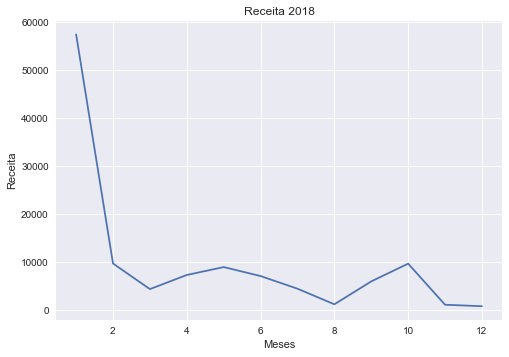

In [126]:
df_2018.groupby(df_2018['Data'].dt.month)['Receita'].sum().plot(
    title='Receita 2018',
    ylabel='Receita',
    xlabel='Meses')

Cidade
Salvador                 150.24
Aracaju               46,276.29
Natal                 71,750.00
Name: Receita, dtype: float64


<AxesSubplot:title={'center':'Receita 2018'}, xlabel='Cidade', ylabel='Receita'>

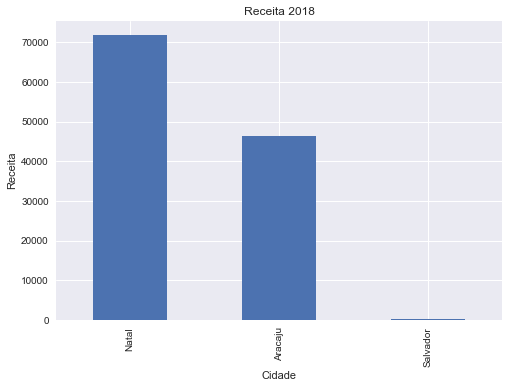

In [127]:
print(df_2018.groupby(df_2018['Cidade'])['Receita'].sum().sort_values())
df_2018.groupby(df_2018['Cidade'])['Receita'].sum().sort_values(ascending=False).plot.bar(
    title='Receita 2018',
    ylabel='Receita',
    xlabel='Cidade')

LojaID
852               35,169.00
854               19,039.00
853               17,542.00
1522              13,816.56
1520              12,063.45
1523              10,974.80
1521               9,421.48
1037                  93.18
1034                  57.06
Name: Receita, dtype: float64


<AxesSubplot:title={'center':'Receita 2018'}, ylabel='LojaID'>

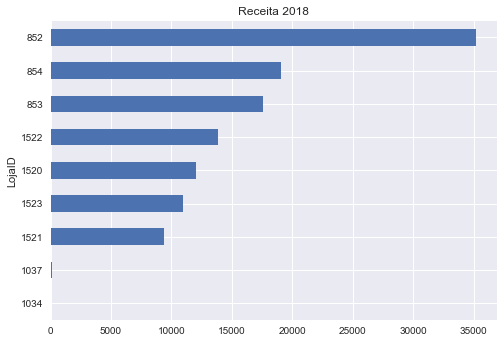

In [129]:
print(df_2018.groupby(df_2018['LojaID'])['Receita'].sum().sort_values(ascending=False))
df_2018.groupby(df_2018['LojaID'])['Receita'].sum().sort_values().plot.barh(
    title='Receita 2018',
    ylabel='Receita',
    xlabel='LojaID')

Data
1     667
2      16
3       7
4      11
5      17
6      13
7      13
8       2
9      10
10     14
11      2
12      3
Name: Qtde, dtype: int64


<AxesSubplot:title={'center':'Quantidade de vendas 2018'}, xlabel='Meses', ylabel='Quantidade'>

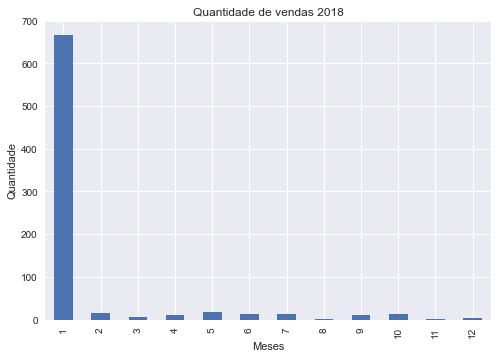

In [74]:
print(df_2018.groupby(df_2018['Data'].dt.month)['Qtde'].sum())
df_2018.groupby(df_2018['Data'].dt.month)['Qtde'].sum().plot.bar(
    title='Quantidade de vendas 2018',
    ylabel='Quantidade',
    xlabel='Meses')

Cidade
Aracaju     646
Natal       123
Salvador      6
Name: Qtde, dtype: int64


<AxesSubplot:title={'center':'Quantidade de vendas 2018'}, xlabel='Cidade', ylabel='Quantidade'>

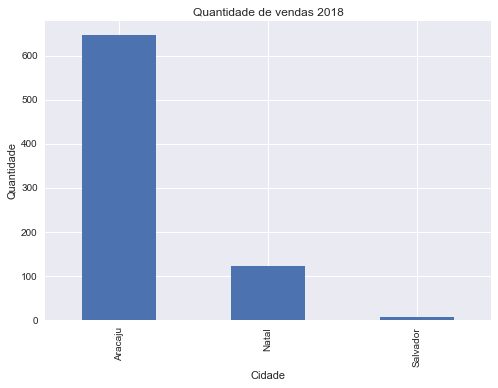

In [76]:
print(df_2018.groupby(df_2018['Cidade'])['Qtde'].sum())
df_2018.groupby(df_2018['Cidade'])['Qtde'].sum().plot.bar(
    title='Quantidade de vendas 2018',
    ylabel='Quantidade',
    xlabel='Cidade')

LojaID
1522    207
1520    193
1523    135
1521    111
852      60
854      33
853      30
1034      3
1037      3
Name: Qtde, dtype: int64


<AxesSubplot:title={'center':'Quantidade de vendas 2018'}, ylabel='LojaID'>

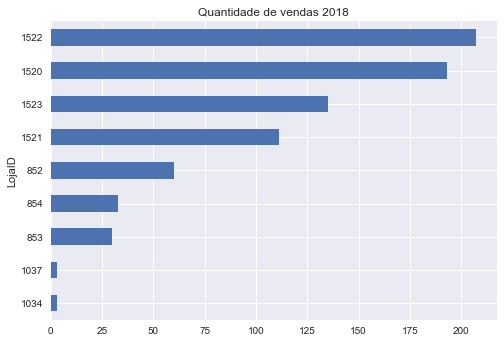

In [131]:
print(df_2018.groupby(df_2018['LojaID'])['Qtde'].sum().sort_values(ascending=False))
df_2018.groupby(df_2018['LojaID'])['Qtde'].sum().sort_values().plot.barh(
    title='Quantidade de vendas 2018',
    ylabel='Quantidade',
    xlabel='LojaID')

### *Analise de 2019*

In [82]:
# Separando as datas
df_2019 = df[df['Data'].dt.year == 2019]
print(df_2019['Data'].dt.year.unique()) # consulta

[2019]


<AxesSubplot:title={'center':'Receita 2019'}, xlabel='Meses', ylabel='Receita'>

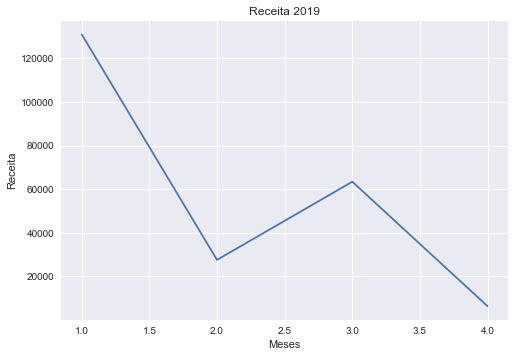

In [83]:
df_2019.groupby(df_2019['Data'].dt.month)['Receita'].sum().plot(
    title='Receita 2019',
    ylabel='Receita',
    xlabel='Meses')

Cidade
Natal                  95,477.52
Recife                 51,936.51
Salvador               40,446.49
Fortaleza              37,913.97
Aracaju                 2,471.96
Name: Receita, dtype: float64


<AxesSubplot:title={'center':'Receita 2019'}, xlabel='Cidade', ylabel='Receita'>

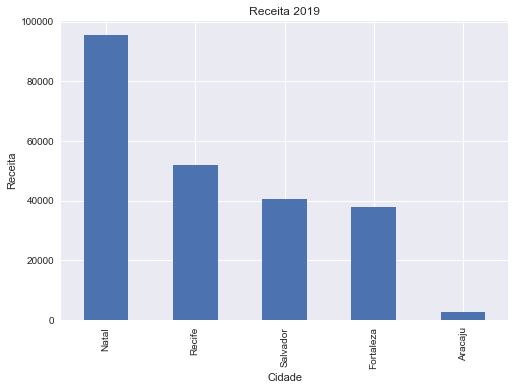

In [134]:
print(df_2019.groupby(df_2019['Cidade'])['Receita'].sum().sort_values(ascending=False))
df_2019.groupby(df_2019['Cidade'])['Receita'].sum().sort_values(ascending=False).plot.bar(
    title='Receita 2019',
    ylabel='Receita',
    xlabel='Cidade')

LojaID
854               27,616.00
853               24,927.00
983               23,415.17
1036              22,235.61
1035              18,693.44
852               17,575.00
1037              16,470.27
982               15,819.33
980               13,598.62
981               11,748.87
1034               8,406.69
1002               7,983.09
1003               6,731.86
1005               6,292.24
1004               4,261.30
1522               1,287.36
1520                 724.36
1523                 460.24
Name: Receita, dtype: float64


<AxesSubplot:title={'center':'Receita 2019'}, ylabel='LojaID'>

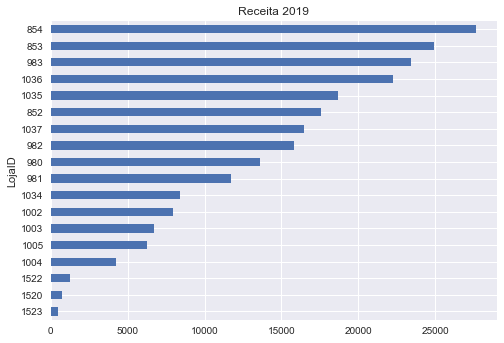

In [137]:
print(df_2019.groupby(df_2019['LojaID'])['Receita'].sum().sort_values(ascending=False))
df_2019.groupby(df_2019['LojaID'])['Receita'].sum().sort_values().plot.barh(
    title='Receita 2019',
    ylabel='Receita',
    xlabel='LojaID')

Data
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64


<AxesSubplot:title={'center':'Quantidade de vendas 2019'}, xlabel='Meses', ylabel='Quantidade'>

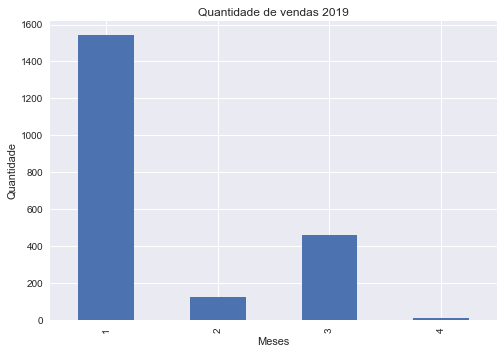

In [92]:
print(df_2019.groupby(df_2019['Data'].dt.month)['Qtde'].sum())
df_2019.groupby(df_2019['Data'].dt.month)['Qtde'].sum().plot.bar(
    title='Quantidade de vendas 2019',
    ylabel='Quantidade',
    xlabel='Meses')

Cidade
Aracaju       28
Natal        426
Salvador     470
Fortaleza    550
Recife       667
Name: Qtde, dtype: int64


<AxesSubplot:title={'center':'Quantidade de vendas 2019'}, xlabel='Cidade', ylabel='Quantidade'>

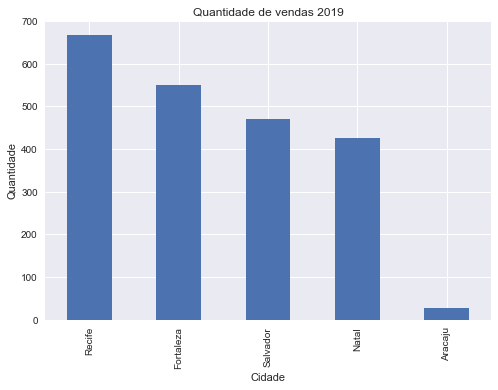

In [110]:
print(df_2019.groupby(df_2019['Cidade'])['Qtde'].sum().sort_values())
df_2019.groupby(df_2019['Cidade'])['Qtde'].sum().sort_values(ascending=False).plot.bar(
    title='Quantidade de vendas 2019',
    ylabel='Quantidade',
    xlabel='Cidade')

### *Analise total 01/2018 - 04/2019*

<AxesSubplot:title={'center':'Receita 01/2018 - 04/2019'}, xlabel='Meses', ylabel='Receita'>

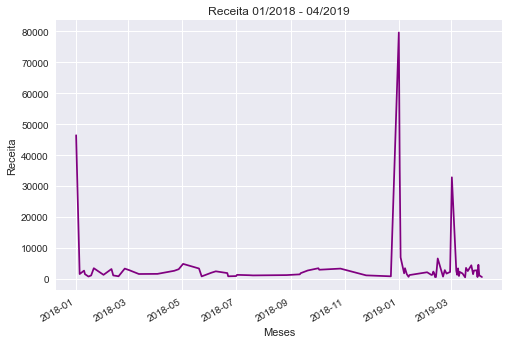

In [178]:
# volume de receita no momento do dataframe
df.groupby(df['Data'])['Receita'].sum().plot(
    title='Receita 01/2018 - 04/2019',
    ylabel='Receita',
    xlabel='Meses',
    color='purple')

<AxesSubplot:title={'center':'Receita 01/2018 - 04/2019'}, xlabel='Cidades', ylabel='Receita'>

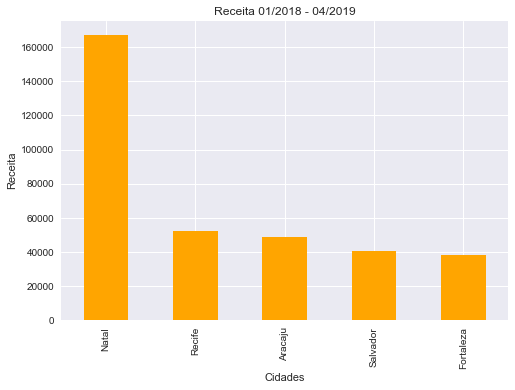

In [177]:
# cidades com a maior receita
df.groupby(df['Cidade'])['Receita'].sum().sort_values(ascending=False).plot.bar(
    title='Receita 01/2018 - 04/2019',
    ylabel='Receita',
    xlabel='Cidades',
    color='orange')

<AxesSubplot:title={'center':'Receita 01/2018 - 04/2019'}, ylabel='ID Loja'>

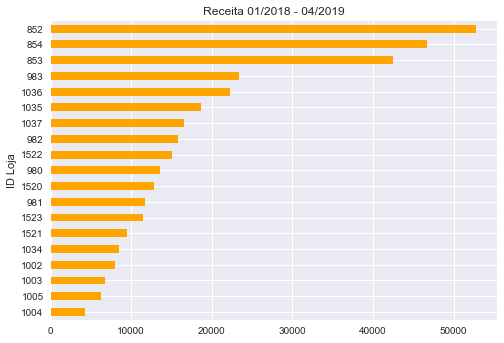

In [176]:
# lojas com a maior receita
df.groupby(df['LojaID'])['Receita'].sum().sort_values().plot.barh(
    title='Receita 01/2018 - 04/2019',
    ylabel='Receita',
    xlabel='ID Loja',
    color='orange')

<AxesSubplot:title={'center':'Receita 01/2018 - 04/2019'}, xlabel='Meses', ylabel='Receita'>

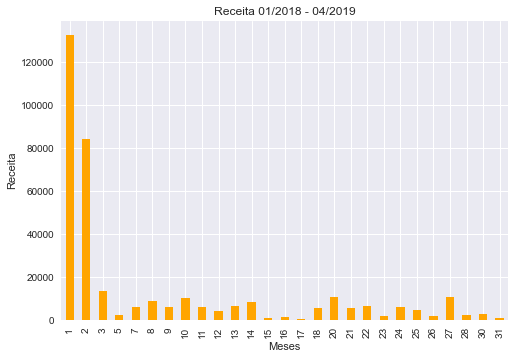

In [174]:
# dias de maior receita
df.groupby(df['Data'].dt.day)['Receita'].sum().plot.bar(
    title='Receita 01/2018 - 04/2019',
    ylabel='Receita',
    xlabel='Meses',
    color='orange')